# <span style="color:#57a989">Análisis de temperaturas en superconductores</span>\

**Materia:** Introducción a la Ciencia de Datos

**Elaborado por:** Eber David Gaytán Medina.

**Fuente:** https://www.kaggle.com/datasets/tunguz/superconductivty-data-data-set/data

**Preguntas de investigación:** ¿Qué relación existe entre la composición de los elementos y la superconductividad a altas temperaturas?


## <span style="color:#57a989">Indice</span>

[1. Limpieza de datos](#1.-Limpieza-de-Datos)

[2. Análisis exploratorio de los datos](#2.-Análisis-Exploratorio-de-los-Datos)

[3. Extracción y selección de características](#3.-Extracción-y-selección-de-características)

[4. Entrenamiento del modelo DNN](#4.-Entrenamiento-del-modelo-DNN)

[5. Evaluación del modelo](#5.-Evaluación-del-modelo)

[6. Conclusiones](#6.-Conclusiones)

In [1]:
# Importar librerias básicas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Eber, recuerda quitar  las innecesarias después antes de empezar a entrenar.

In [2]:
# Cargar el dataset
df = pd.read_csv('train.csv')

### <span style="color:#57a989">1. Limpieza de datos</span>

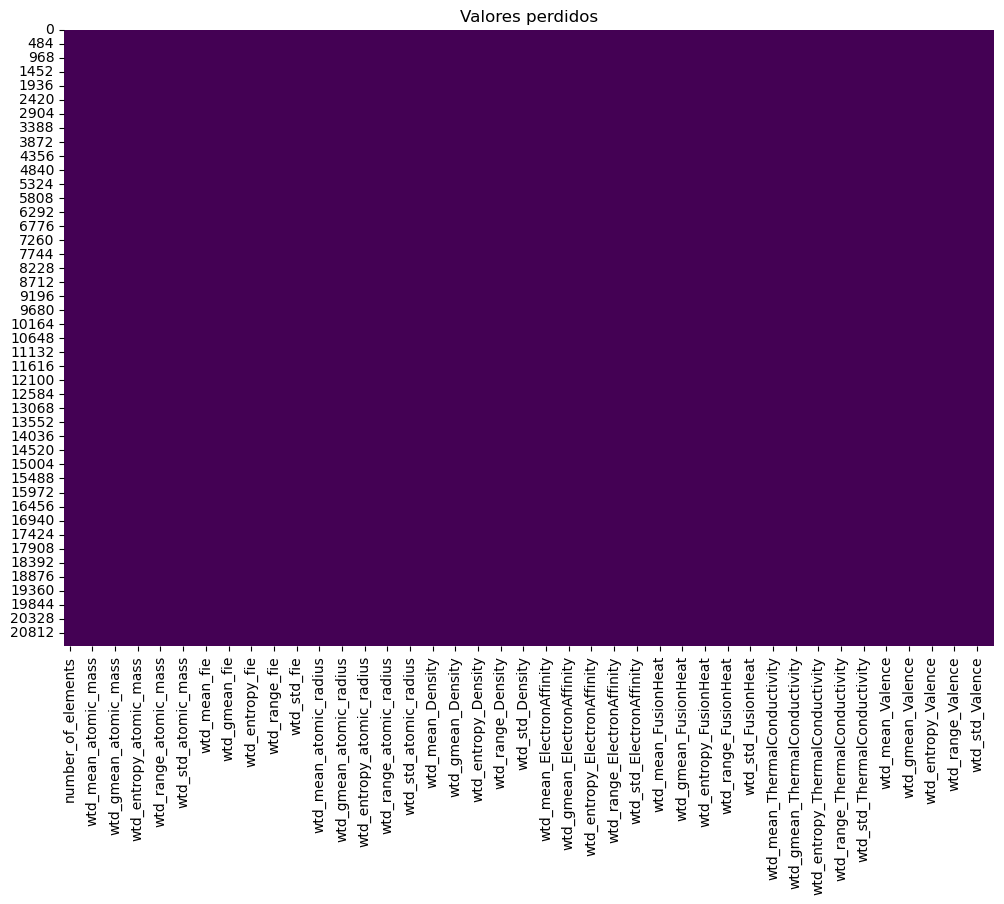

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores perdidos')
plt.show()

In [4]:
display("Entradas duplicadas", df.duplicated().sum())
display("Entradas NaN",df.isnull().sum())

'Entradas duplicadas'

66

'Entradas NaN'

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [5]:
df = df.dropna()
df = df.drop_duplicates()

In [6]:
### <span style="color:#57a989">1. Limpieza de Datos</span>display("Entradas duplicadas", df.duplicated().sum())
display("Entradas NaN",df.isnull().sum())

'Entradas NaN'

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

**Observaciones**

+ El dataset fue limpiado previamente por lo que los cambios fueron mínimos.

### <span style="color:#57a989">2. Análisis exploratorio de los datos</span>

In [7]:
display(df.head(15))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [8]:
df.shape

(21197, 82)

In [9]:
correlations = df.corr(numeric_only=True)["critical_temp"].sort_values(ascending=False).drop("critical_temp")
for feature, correlation in correlations.items():
    print(f"{feature} : {correlation:.6f}")

wtd_std_ThermalConductivity : 0.720960
range_ThermalConductivity : 0.687282
range_atomic_radius : 0.653394
std_ThermalConductivity : 0.653232
wtd_entropy_atomic_mass : 0.626536
wtd_entropy_atomic_radius : 0.602986
number_of_elements : 0.600394
range_fie : 0.600179
wtd_std_atomic_radius : 0.598972
entropy_Valence : 0.598024
wtd_entropy_Valence : 0.589204
wtd_std_fie : 0.581442
entropy_fie : 0.567156
wtd_entropy_FusionHeat : 0.562808
std_atomic_radius : 0.559132
entropy_atomic_radius : 0.558249
entropy_FusionHeat : 0.552069
entropy_atomic_mass : 0.542894
std_fie : 0.541091
range_atomic_mass : 0.491642
wtd_range_ThermalConductivity : 0.469053
entropy_Density : 0.456492
entropy_ElectronAffinity : 0.436357
wtd_entropy_Density : 0.400023
wtd_mean_fie : 0.397888
wtd_entropy_fie : 0.387703
wtd_mean_ThermalConductivity : 0.379173
std_atomic_mass : 0.378519
mean_ThermalConductivity : 0.375649
wtd_std_atomic_mass : 0.358928
wtd_gmean_fie : 0.342814
wtd_std_ElectronAffinity : 0.314836
wtd_range_fi

### <span style="color:#57a989">3. Extracción y selección de características</span>

In [10]:
df_ext = pd.read_csv("unique_m.csv")
merged_df = pd.merge(df, df_ext, on='critical_temp')

In [11]:
display(merged_df.isnull().sum())

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
Bi                       0
Po                       0
At                       0
Rn                       0
material                 0
Length: 169, dtype: int64

In [12]:
dff = merged_df.drop('material', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Preprocesamiento de datos (igual que antes)
y_sample = dff[['critical_temp']]
X_sample = dff.drop('critical_temp', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

scaler = MinMaxScaler() # O StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.astype(np.float32)  # Asegurar tipo float32
X_test = X_test.astype(np.float32)
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

In [15]:
X_test.shape

(142797, 167)

### <span style="color:#57a989">4. Entrenamiento del modelo DNN</span>

In [16]:
import tensorflow as tf
from tensorflow import keras

# Definir los hiperparámetros
input_size = 167  # Número de características
sequence_length = 10  # Longitud de la secuencia, ajústala según tu problema

# Cambiar a una arquitectura de RNN
model = keras.Sequential([
    keras.layers.Input(shape=(sequence_length, input_size)),  # Entrada con forma secuencial
    keras.layers.SimpleRNN(128, activation='tanh', return_sequences=True),  # RNN con salida secuencial
    keras.layers.Dropout(0.3),  # Dropout para regularización
    keras.layers.SimpleRNN(64, activation='tanh'),  # Otra capa RNN
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),  # Capa densa para procesar la salida de la RNN
    keras.layers.Dense(1)  # Salida para regresión
])

# Compilar el modelo
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # MSE para regresión

# Callback para ajustar la tasa de aprendizaje
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:  # Cada 10 épocas
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test), callbacks=[lr_callback])

Epoch 1/100


2024-11-18 22:22:59.603573: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 381553584 exceeds 10% of free system memory.


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 167), dtype=float32). Expected shape (None, 10, 167), but input has incompatible shape (None, 167)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 167), dtype=float32)
  • training=True
  • mask=None

In [17]:
# Definir el modelo de Keras
input_size = 167
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(input_size,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1) # Sin activación para regresión
])

# Compilar el modelo
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # MSE para regresión

# Ajustar el learning rate (opcional, pero recomendado)
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0: # cada 10 épocas
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)


# Entrenar el modelo
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test), callbacks=[lr_callback])

/home/eber/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


2024-11-18 22:24:46.455861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 381553584 exceeds 10% of free system memory.


17850/17850 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 269.0125 - mae: 11.5015 - val_loss: 154.3574 - val_mae: 8.5245 - learning_rate: 0.0010
Epoch 2/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 167.0387 - mae: 8.8393 - val_loss: 148.1115 - val_mae: 8.3964 - learning_rate: 0.0010
Epoch 3/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 156.7396 - mae: 8.4993 - val_loss: 131.8020 - val_mae: 7.8333 - learning_rate: 0.0010
Epoch 4/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 147.7520 - mae: 8.2049 - val_loss: 129.7887 - val_mae: 7.6113 - learning_rate: 0.0010
Epoch 5/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 143.7650 - mae: 8.0544 - val_loss: 129.6202 - val_mae: 7.3658 - learning_rate: 0.0010
Epoch 6/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - loss: 138.2797 - mae: 7.8893 - val_loss: 128.1706 - val_mae: 7.8150 - learning_rate: 0.0010
Epoch 7/100
17850/17850 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 133.5077 - mae: 7.7244 - val_loss

Mean Squared Error (MSE): 81.7778
Mean Absolute Error (MAE): 6.0319
4463/4463 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


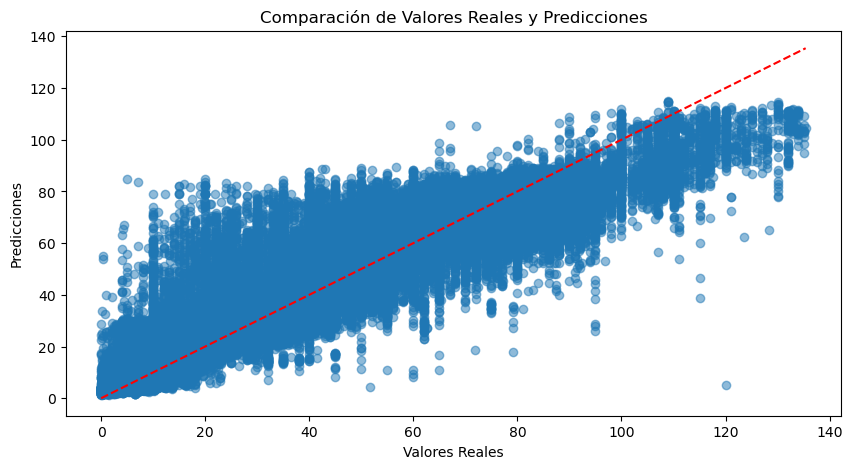

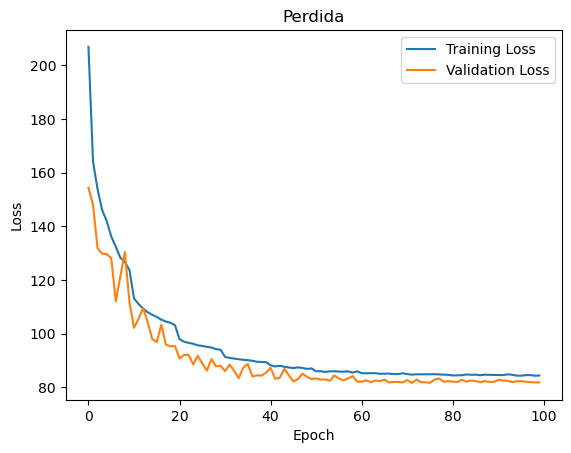

In [21]:
# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error (MSE): {loss:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


# Predicciones y gráfico
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Valores Reales y Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


# Mostrar la pérdida y mae durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

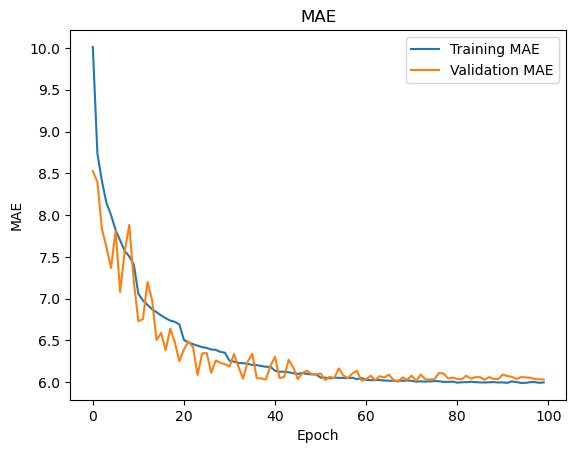

In [19]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score

# Obtener las predicciones del modelo
y_train_pred = model.predict(X_train)

# Calcular el coeficiente de determinación R^2
r2_train = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2_train}")
print(f"R^2: {r2}")


   69/17850 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step  

2024-11-19 00:08:40.314524: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 381553584 exceeds 10% of free system memory.


17850/17850 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
R^2: 0.9227256178855896
R^2: 0.92106032371521


# Conclusiones